<a href="https://colab.research.google.com/github/teamapadrasta/Mobile-Net/blob/main/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define the path to the training data directory
train_data_dir = '/content/drive/MyDrive/EPICS - IEEE/DATA SET/DATA SET'

# Create an ImageDataGenerator instance with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Use flow_from_directory to create the training data generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['bio', 'non_bio']  # Explicitly specify class names
)

# Print out the class indices to ensure the classes are correctly mapped
print(train_generator.class_indices)


Found 454 images belonging to 2 classes.
{'bio': 0, 'non_bio': 1}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EPICS - IEEE/DATA SET/DATA SET',

    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['non_bio', 'bio']  # specify classes explicitly
)



Found 454 images belonging to 2 classes.


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10
)


Epoch 1/10
14/14 [==============================] - 34s 2s/step - loss: 0.7191 - accuracy: 0.8768
Epoch 2/10
14/14 [==============================] - 25s 2s/step - loss: 0.0978 - accuracy: 0.9739
Epoch 3/10
14/14 [==============================] - 26s 2s/step - loss: 0.0724 - accuracy: 0.9787
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.0167 - accuracy: 0.9976
Epoch 5/10
14/14 [==============================] - 27s 2s/step - loss: 0.0124 - accuracy: 0.9953
Epoch 6/10
14/14 [==============================] - 25s 2s/step - loss: 0.0197 - accuracy: 0.9953
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.0090 - accuracy: 0.9953
Epoch 8/10
14/14 [==============================] - 25s 2s/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/10
14/14 [==============================] - 28s 2s/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 27s 2s/step - loss: 0.0022 - accuracy: 1.0000


In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    return preds[0][0]

# Example usage
test_image_path = '/content/drive/MyDrive/IMG-20240610-WA0012.jpg'
result = predict_image(test_image_path)

if result >= 0.5:
    print(f'The image {test_image_path} is classified as BIO.')
else:
    print(f'The image {test_image_path} is classified as NON-BIO.')


1/1 [==============================] - 1s 1s/step
The image /content/drive/MyDrive/IMG-20240610-WA0012.jpg is classified as NON-BIO.


orgn


In [ ]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [ ]:
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

#  layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  #  (bio or not bio)

model = Model(inputs=base_model.input, outputs=predictions)

#  Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EPICS - IEEE/DATA SET/DATA SET',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['bio', 'non_bio'],  # specify classes explicitly
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EPICS - IEEE/DATA SET/DATA SET',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['bio', 'non_bio'],  # specify classes explicitly
    subset='validation'
)

# Debugging: Check if any images are found
print(f"Found {train_generator.n} training images belonging to {train_generator.num_classes} classes.")
print(f"Found {validation_generator.n} validation images belonging to {validation_generator.num_classes} classes.")

if train_generator.n == 0 or validation_generator.n == 0:
    raise ValueError("No images found. Please check the directory path and structure.")

Found 364 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 364 training images belonging to 2 classes.
Found 90 validation images belonging to 2 classes.


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

# Save the trained model
model.save('bio_non_bio_classifier_mobilenetv2.h5')


Epoch 1/10
11/11 [==============================] - 33s 3s/step - loss: 0.6269 - accuracy: 0.8645 - val_loss: 0.2076 - val_accuracy: 0.9375
Epoch 2/10
11/11 [==============================] - 24s 2s/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.0765 - val_accuracy: 0.9844
Epoch 3/10
11/11 [==============================] - 28s 3s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9844
Epoch 4/10
11/11 [==============================] - 30s 3s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9844
Epoch 5/10
11/11 [==============================] - 31s 3s/step - loss: 8.7813e-04 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9844
Epoch 6/10
11/11 [==============================] - 26s 2s/step - loss: 6.8556e-04 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 0.9844
Epoch 7/10
11/11 [==============================] - 23s 2s/step - loss: 4.6479e-04 - accuracy: 1.0000 - val_loss: 0.0781 - val_accuracy: 0.9844
Epoch 8/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Function to predict the image class
def predict_image(image_path):
    x = preprocess_image(image_path)
    preds = model.predict(x)
    return preds[0][0]

# Function to display the image with its predicted label
def display_prediction(image_path, prediction):
    img = image.load_img(image_path)
    img = np.array(img, dtype=np.uint8)
    plt.imshow(img)
    plt.title(f"Predicted: {'NON-BIO' if prediction >= 0.5 else 'BIO'}")
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 107ms/step
The predicted class of /content/drive/MyDrive/EPICS - IEEE/output_dir/stingbo28.jpeg is: NON-BIO


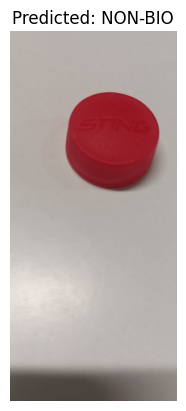

In [ ]:
new_image_path = '/content/drive/MyDrive/EPICS - IEEE/output_dir/stingbo28.jpeg'  # Replace with your new image path
prediction = predict_image(new_image_path)
print(f"The predicted class of {new_image_path} is: {'NON-BIO' if prediction >= 0.5 else 'BIO'}")
display_prediction(new_image_path, prediction)

1/1 [==============================] - 0s 69ms/step
The predicted class of /content/drive/MyDrive/EPICS - IEEE/output_dir/Copy of paperplate1.png is: BIO


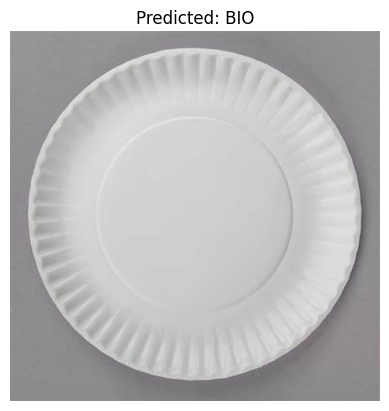

In [ ]:
new_image_path = '/content/drive/MyDrive/EPICS - IEEE/output_dir/Copy of paperplate1.png'  # Replace with your new image path
prediction = predict_image(new_image_path)
print(f"The predicted class of {new_image_path} is: {'NON-BIO' if prediction >= 0.5 else 'BIO'}")
display_prediction(new_image_path, prediction)

In [ ]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

#  layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  #  (bio or not bio)

model = Model(inputs=base_model.input, outputs=predictions)

#  Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EPICS - IEEE/DATA SET/DATA SET',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['bio', 'non_bio'],  # specify classes explicitly
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/EPICS - IEEE/DATA SET/DATA SET',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    classes=['bio', 'non_bio'],  # specify classes explicitly
    subset='validation'
)

# Debugging: Check if any images are found
print(f"Found {train_generator.n} training images belonging to {train_generator.num_classes} classes.")
print(f"Found {validation_generator.n} validation images belonging to {validation_generator.num_classes} classes.")

if train_generator.n == 0 or validation_generator.n == 0:
    raise ValueError("No images found. Please check the directory path and structure.")model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

# Save the trained model
model.save('bio_non_bio_classifier_mobilenetv2.h5')
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Function to predict the image class
def predict_image(image_path):
    x = preprocess_image(image_path)
    preds = model.predict(x)
    return preds[0][0]

# Function to display the image with its predicted label
def display_prediction(image_path, prediction):
    img = image.load_img(image_path)
    img = np.array(img, dtype=np.uint8)
    plt.imshow(img)
    plt.title(f"Predicted: {'NON-BIO' if prediction >= 0.5 else 'BIO'}")
    plt.axis('off')
    plt.show()
new_image_path = '/content/drive/MyDrive/EPICS - IEEE/output_dir/stingbo28.jpeg'  # Replace with your new image path
prediction = predict_image(new_image_path)
print(f"The predicted class of {new_image_path} is: {'NON-BIO' if prediction >= 0.5 else 'BIO'}")
display_prediction(new_image_path, prediction)   convert